<a href="https://colab.research.google.com/github/mathsonGIT/programming_courses/blob/master/pandas_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data_mo.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   href       3778 non-null   object
 1   title      3052 non-null   object
 2   alt_title  723 non-null    object
 3   date       3778 non-null   object
 4   text       3778 non-null   object
dtypes: object(5)
memory usage: 147.7+ KB


In [ ]:
df.tail(1)

,href,title,alt_title,date,text
3777,https://ria.ru/20231116/filosofy-1909930843.html,Российские философы рассказали о перспективах ...,NaN,19:00 16.11.2023,"МОСКВА, 16 ноя – РИА Новости. В феврале 2024 ..."


In [ ]:
df.head()

,href,title,alt_title,date,text
0,https://ria.ru/20220101/suda-1766343422.html,Украина закрыла свои порты для российских судов,NaN,07:21 01.01.2022,"МОСКВА, 1 янв — РИА Новости. Закон, запрещающ..."
1,https://ria.ru/20220104/tkachenko-1766187383.html,NaN,Всеволод Ткаченко: Россия не рассматривает Афр...,12:00 04.01.2022,"Россия не считает, что Африка является арено..."
2,https://ria.ru/20220104/bayden-1766539845.html,В США предложили неожиданный способ заставить ...,NaN,12:15 04.01.2022,"МОСКВА, 4 янв — РИА Новости. Американским вла..."
3,https://ria.ru/20220104/lavrov-1766574002.html,Лавров обсудил с главой МИД Индии двусторонние...,NaN,19:16 04.01.2022,"МОСКВА, 4 янв - РИА Новости. Министр иностран..."
4,https://ria.ru/20220104/mid-1766579658.html,МИД назвал объявление в Косово россиянина перс...,NaN,20:31 04.01.2022,"МОСКВА, 4 янв - РИА новости. В МИД РФ назвали..."


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%H:%M %d.%m.%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   href       3778 non-null   object        
 1   title      3052 non-null   object        
 2   alt_title  723 non-null    object        
 3   date       3778 non-null   datetime64[ns]
 4   text       3778 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 147.7+ KB


In [ ]:
df.set_index('date', inplace=True)

In [ ]:
len(df.loc['06-2023'])

198

<Axes: xlabel='date'>

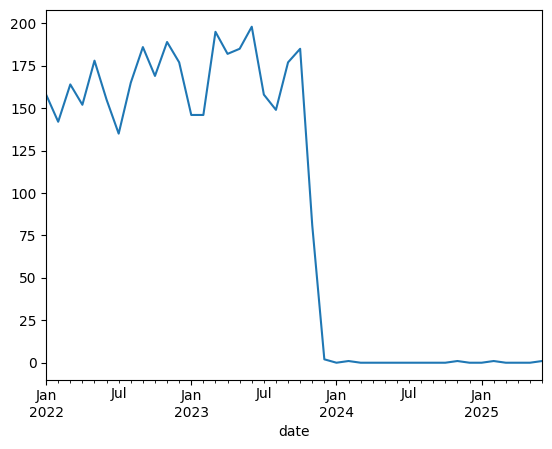

In [ ]:
df['text'].resample('ME').count().plot()

In [ ]:
df['len_text'] = df.apply(func = lambda row: len(row.text), axis = 1)

In [ ]:
df.loc[df['len_text'].idxmax(), 'text']

'Заместитель председателя Совета безопасности Росии  Дмитрий Медведев  дал большое интервью РИА Новости и нескольким другим ведущим российским СМИ. В беседе с журналистами он ответил на вопросы о пандемии COVID-19, международной безопасности, ситуации на Украине, в Казахстане, отношениях с США, ответе на санкции, включая возможное отключение SWIFT, а также о перспективе четырехдневной рабочей недели и многие другие. — Свой первый год работы в Совете безопасности вы оценили как год очень напряженный. А для 2021 года какие слова и определения есть? — Обычно в конце года подводят итоги, и эти итоги всегда заключаются в том, что год был непростой. Люди ждут, что и руководством страны, и просто за семейным столом эти слова будут произнесены. Но непростые годы отличаются друг от друга. Я наблюдаю за развитием событий не только как обычный человек, но и как должностное лицо. Сложные годы были и раньше. Я вспоминаю 2008, 2009 годы. Там и международная напряженность, и военный конфликт, и начал

In [ ]:
df['len_text'].max()

96652

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3778 entries, 2022-01-01 07:21:00 to 2023-11-16 19:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   href       3778 non-null   object
 1   title      3052 non-null   object
 2   alt_title  723 non-null    object
 3   text       3778 non-null   object
 4   len_text   3778 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 306.1+ KB


In [ ]:
df.iloc[df['text'].to_list()[0].__contains__('закон'), :]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [ ]:
df_law_contains = df[df['text'].str.contains('закон')]

In [ ]:
df_law_contains = df[df['text'].str.contains('Путин')]

In [ ]:
df_law_contains.text[0]

/tmp/ipython-input-1264654129.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_law_contains.text[0]


'МОСКВА, 4 янв — РИА Новости.  Американским властям необходимо как следует надавить на  Иран  в вопросе ядерной сделки, чтобы Россия и Китай начали всерьез относиться к президенту  Джо Байдену . Об этом пишет бывший спичрайтер Джорджа Буша — младшего Уильям Макгерн в колонке для  The Wall Street Journal . "У Байдена есть не только отличная возможность предотвратить появление ядерной бомбы у  Тегерана , но и заставить президента России  Владимира Путина  и главу КНР  Си Цзиньпина  дважды подумать, прежде чем предпринимать действия на международной арене", — считает автор. По его мнению, пока что риторика Белого дома не может убедить  Пекин  или  Москву  отступить от выбранного внешнеполитического курса, что говорит об отсутствии у Байдена авторитета среди мировых лидеров. Так, Макгерн предлагает предоставить  Израилю  дополнительное вооружение, чтобы  Тель-Авив  мог атаковать стратегические объекты на территории Ирана, в частности нефтехранилища. Автор приводит в пример президента  Рона

In [ ]:
len(df_law_contains.text)

1117

In [ ]:
df_law_contains.loc[df_law_contains['len_text'].idxmax(), 'text']

'Заместитель председателя Совета безопасности Росии  Дмитрий Медведев  дал большое интервью РИА Новости и нескольким другим ведущим российским СМИ. В беседе с журналистами он ответил на вопросы о пандемии COVID-19, международной безопасности, ситуации на Украине, в Казахстане, отношениях с США, ответе на санкции, включая возможное отключение SWIFT, а также о перспективе четырехдневной рабочей недели и многие другие. — Свой первый год работы в Совете безопасности вы оценили как год очень напряженный. А для 2021 года какие слова и определения есть? — Обычно в конце года подводят итоги, и эти итоги всегда заключаются в том, что год был непростой. Люди ждут, что и руководством страны, и просто за семейным столом эти слова будут произнесены. Но непростые годы отличаются друг от друга. Я наблюдаю за развитием событий не только как обычный человек, но и как должностное лицо. Сложные годы были и раньше. Я вспоминаю 2008, 2009 годы. Там и международная напряженность, и военный конфликт, и начал

In [ ]:
filtered_words_lists = df['text'].apply(lambda row: [word for word in row.split() if len(word) >= 4])


combined_list = sum(filtered_words_lists.tolist(), [])


In [ ]:
Counter(combined_list).most_common(5)


[('России', 5986),
 ('также', 3453),
 ('года', 3219),
 ('Новости.', 3155),
 ('которые', 3112)]

In [ ]:
from collections import Counter

In [ ]:
df_not_war.to_csv("Not_war_.csv")


In [ ]:
df_not_war=(df[~df['text'].str.contains('воен')])


In [ ]:
df_law_contains.text[0]


/tmp/ipython-input-1607753459.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_law_contains.text[0]


'МОСКВА, 24 янв — РИА Новости.  Читатели французской газеты  Le Figaro  прокомментировали новости о том, что Госдепартамент США разрешил некоторым сотрудникам американского посольства в Киеве и членам их семей покинуть дипмиссию. Многие комментаторы отметили, что действия американских властей не способствуют урегулированию кризиса. "Похоже, дипломатическая игра США состоит в том, чтобы драматизировать ситуацию, сыграть на обострение?" — поинтересовался пользователь с ником Doria. "Граждане США на Украине также должны рассмотреть вопрос о выезде из страны", — говорится в заявлении Госдепартамента. А какие "граждане": туристы или военные наемники?" — спросил Gentilhomme-Vieille Canaille 94. "Байдену нужна война, чтобы прийти в себя после катастрофического побега из Афганистана. Лучше было бы побеспокоиться о гуманитарной ситуации в Донбассе. Что касается русских, то они проводят учения в пределах своих границ, как и все другие страны", — заявил Mamanchml. "Никто не забыл об оружии массов